In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from scipy import stats 

In [2]:
df = pd.read_csv('model_data_1.csv')

In [3]:
df.columns

Index(['Age', 'seller_type', 'fuel_type', 'transmission_type', 'mileage',
       'engine', 'max_power', 'seats', 'Min new price_boxcox',
       'Max new price_boxcox', 'km_driven_boxcox', 'selling_price_boxcox'],
      dtype='object')

In [4]:
X = df.drop(['selling_price_boxcox'],axis=1)
y = df['selling_price_boxcox']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
from sklearn.model_selection import cross_val_score,KFold,cross_validate


mse=cross_val_score(lin_reg,X=X,y=y,cv=5,scoring="neg_mean_squared_error")
print("cv mean is:",mse.mean())

cv mean is: -0.11723053476201724


# Ridge

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [11]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-0.11720777671918718


# Lasso

In [7]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.11722269900014334


In [13]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

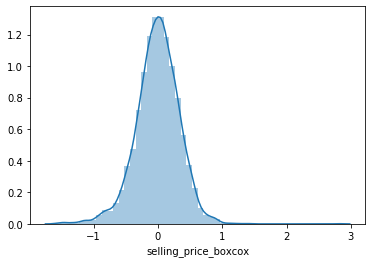

In [14]:
sns.distplot(y_test-prediction_lasso)

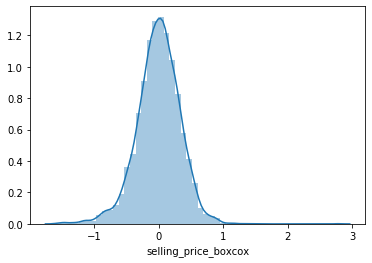

In [15]:
sns.distplot(y_test-prediction_ridge)

In [9]:
lasso.fit(X_train , y_train)
pred = lasso.predict(X_test)

In [10]:
coeff_df = pd.DataFrame({'Coeficient':lasso.coef_,'Columns':X_train.columns})
coeff_df

,Coeficient,Columns
0,-0.0,Age
1,-0.0,seller_type
2,-0.0,fuel_type
3,-0.0,transmission_type
4,-0.0,mileage
5,0.0,engine
6,0.0,max_power
7,0.0,seats
8,0.0,Min new price_boxcox
9,0.0,Max new price_boxcox
